In [1]:
import numpy as np
import seaborn as sns
from collections import Counter
import pandas as pd
import scipy
import sklearn.model_selection
import statistics

# Dataset selection

In [2]:
# Результаты определения плотности в петлях трикотажного полотна, петл./5 см.
sample_1 = [float(x)/100 for x in """67 65 65 62 63 66 68 71 68 64 61 63 60
                            71 64 64 69 59 65 64 64 65 64 66 64 62
                            64 68 65 67 67 67 67 71 68 71 69 65 67
                            62 68 70 67 64 65 65 64 61 66 67 61 65
                            64 70 64 68 60 61 68 65 60 67 65 63 65
                            65 63 64 66 62 65 65 68 61 65 61 64 62
                            68 69 70 71 70 69 70 71 65 71 70 71 69
                            70 64 71 70 70 68 70 62 66 69 70 71 69
                            72 73 74 73 70 63 67 65 63 68 70""".split()]
sample_1_train, sample_1_test = sklearn.model_selection.train_test_split(sample_1, test_size=0.2, train_size=0.8)
n_1_train = len(sample_1_train)
n_1_train

92

In [3]:
# Результаты определения плотности в петлях трикотажного полотна, петл./10 см.
sample_2 = [float(x)/100 for x in """69, 67, 66, 64, 66, 67, 69, 72, 71,
                               66, 64, 64, 62, 73, 65, 66, 71, 62,
                               68, 67, 67, 67, 66, 67, 65, 65, 66,
                               70, 68, 69, 70, 69, 68, 74, 71, 74,
                               71, 67, 68, 64, 70, 71, 69, 67, 67,
                               68, 65, 63, 68, 70, 62, 67, 65, 71,
                               67, 71, 63, 62, 70, 67, 62, 70, 67,
                               65, 67, 68, 64, 67, 67, 63, 68, 67,
                               71, 63, 68, 62, 67, 65, 70, 70, 72,
                               73, 72, 71, 71, 74, 68, 73, 72, 72,
                               71, 71, 65, 74, 71, 73, 69, 71, 64, 
                               69, 72, 71, 74, 72, 73, 75, 77""".split(",")]
sample_2_train, sample_2_test = sklearn.model_selection.train_test_split(sample_2, test_size=0.2, train_size=0.8)
n_2_train = len(sample_2_train)
n_2_train

85

In [4]:
def calculate_mid(sample):
    x_mid = np.sum(sample) / len(sample)
    return x_mid

In [5]:
calculate_mid(sample_1_train)

0.6648913043478261

In [6]:
calculate_mid(sample_2_train)


0.6829411764705882

In [7]:
def calculate_variance(sample):
    return np.sum((sample - calculate_mid(sample))**2) / len(sample)
    # x_d = np.round(np.sum(sorted_count_1[i][0] - calculate_mid(sample))**2 for i in range(len(sorted_count_1))] / n_1_train, 7)
    # return x_d

In [8]:
calculate_variance(sample_1_train)

0.00115977079395085

In [9]:
calculate_variance(sample_2_train)

0.0011007612456747392

# Функции распределения и плотности распределения

In [10]:
def pdf_optimized(k: int, rnd_list: list) -> pd.DataFrame:
    """
    Получает кривую плотности распределения вероятности
    :param k: количечиво интервалов разбиения гистограммы
    :param rnd_list: случайный процесс
    :return: pandas.DataFrame
    """
    pdf_x = []  # Координаты по оси абсцисс
    pdf_y = []  # Координаты по оси ординат
    n = len(rnd_list)  # количество элементов в рассматриваемой выборке
    h = (max(rnd_list) - min(rnd_list)) / k  # ширина одного интервала
    a = min(rnd_list)  # минимальное значение в рассматриваемой выборке
    rnd_list = sorted(rnd_list)  # сортируем значения
    j = 0  # индекс значения левой границы интервала 
    for i in range(0, k):  # проход по интервалам
        count = 0
        while j < n and (a + i * h) <= rnd_list[j] < (a + (i * h) + h):  # подсчитываем количество значений в k-м интервале
            count = count + 1
            j += 1
        pdf_x.append(a + i * h + h / 2)  # координата по оси абсцисс полученной кривой плотности распределения вероятности
        pdf_y.append(count / (n * h))  # координата по оси ординат полученной кривой плотности распределения вероятности
    d = {'x': pdf_x, 'y': pdf_y}
    return pd.DataFrame(d)

In [11]:
sample_1_train = np.array(sample_1_train)
sample_2_train = np.array(sample_2_train)

sample_1_test = np.array(sample_1_test)
sample_2_test = np.array(sample_2_test)

sample_1_train.sort()
sample_2_train.sort()

In [12]:
def calculate_distr_func(x, point):
    return np.sum(x <= point) / len(x)

In [13]:
values_1 = list(map(lambda point: calculate_distr_func(sample_1_train, point), sample_1_train))

<Axes: >

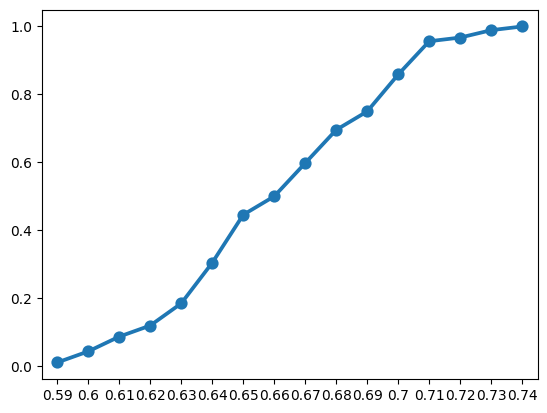

In [14]:
sns.pointplot(x = sample_1_train, y = values_1)

In [15]:
data_to_plot_1 = pdf_optimized(10, sample_1_train) # плотность распределения

<Axes: xlabel='x', ylabel='y'>

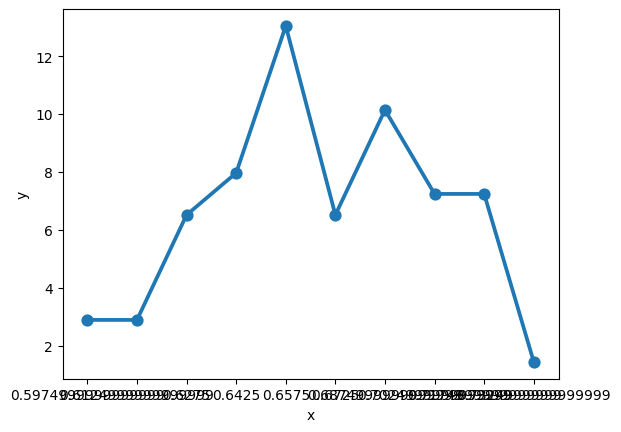

In [16]:
sns.pointplot(x=data_to_plot_1["x"], y=data_to_plot_1["y"])

In [17]:
values_2 = list(map(lambda point: calculate_distr_func(sample_2_train, point), sample_2_train))

<Axes: >

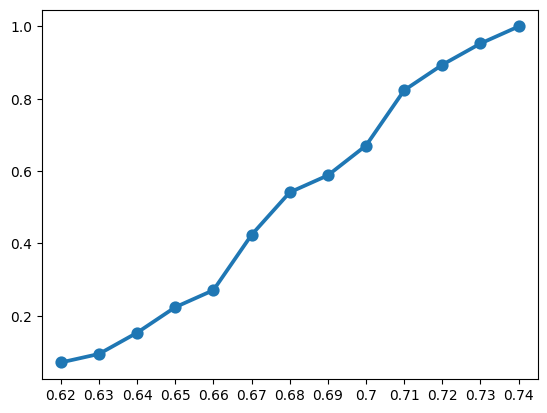

In [18]:
# sample_2.sort()
sns.pointplot(x = sample_2_train, y = values_2)

In [19]:
data_to_plot_2 = pdf_optimized(10, sample_2_train) # плотность распределения

<Axes: xlabel='x', ylabel='y'>

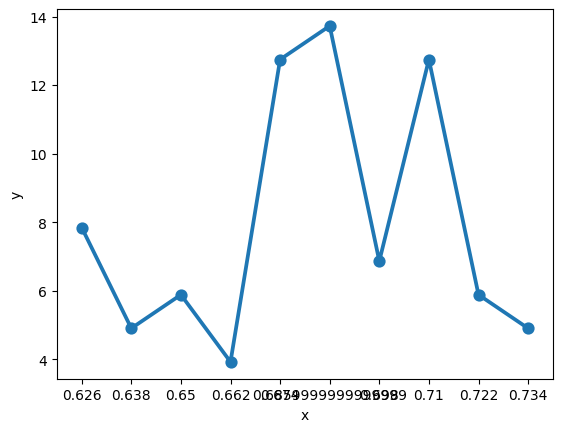

In [20]:
sns.pointplot(x=data_to_plot_2["x"], y=data_to_plot_2["y"])

# Апроксимация $F_1$ и $F_2$

In [21]:
def f(alpha, beta, x):
    return 1 - np.exp(alpha * x ** beta)

In [22]:
def minimum_square_method(coefs, x):
    alpha, beta = coefs
    # print(alpha, beta)
    x_new = np.arange(min(x), max(x), (max(x)-min(x)) / 100)
    y = list(map(lambda point: calculate_distr_func(x, point), x_new))
    return np.sum((f(alpha, beta, x_new) - y)**2)

In [23]:
res_1 = scipy.optimize.minimize(minimum_square_method, [-0.1, 0.3], args = (sample_1_train, ))

In [24]:
alpha_1, beta_1 = res_1.x
print(f'Оценка Альфа_1: {alpha_1}')
print(f'Оценка Бета_1: {beta_1}')

Оценка Альфа_1: -3260.6328439694244
Оценка Бета_1: 20.963120948583708


<Axes: >

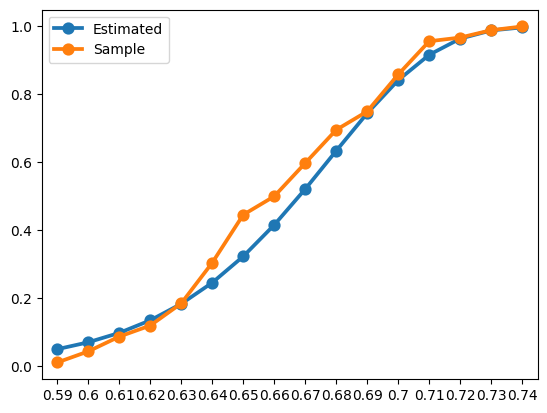

In [25]:
sns.pointplot(x = sample_1_train, y = f(alpha_1, beta_1, sample_1_train), label = 'Estimated')
sns.pointplot(x = sample_1_train, y = values_1, label = 'Sample')

In [26]:
res_2 = scipy.optimize.minimize(minimum_square_method, [0, 0], args = (sample_2_train, ))

In [27]:
alpha_2, beta_2 = res_2.x
print(f'Оценка Альфа_2: {alpha_2}')
print(f'Оценка Бета_2: {beta_2}')

Оценка Альфа_2: -2355.342501099408
Оценка Бета_2: 21.607510400153767


<Axes: >

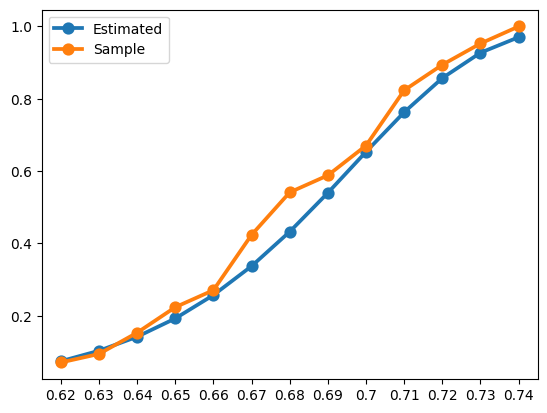

In [28]:
sns.pointplot(x = sample_2_train, y = f(alpha_2, beta_2, sample_2_train), label = 'Estimated')
sns.pointplot(x = sample_2_train, y = values_2, label = 'Sample')

In [29]:
def moment_method(sample_1, sample_2):
    beta = calculate_variance(np.log(sample_1)) / (calculate_variance(np.log(sample_2)))
    alpha = np.exp(- beta*calculate_mid(np.log(sample_2)) + calculate_mid(np.log(sample_1)))
    return alpha, beta

In [30]:
alpha, beta = moment_method(sample_1_train, sample_2_train)
alpha, beta

(1.0128376003864614, 1.1036959656145302)

In [31]:
print(alpha_1 / alpha_2)
print(beta_1 / beta_2)

1.3843561360810381
0.9701775244053348


In [37]:
sample_2_test

array([0.63, 0.66, 0.7 , 0.69, 0.75, 0.69, 0.65, 0.67, 0.74, 0.77, 0.71,
       0.63, 0.69, 0.72, 0.65, 0.64, 0.71, 0.66, 0.67, 0.67, 0.67, 0.67])

In [38]:
sample_1_test

array([0.69, 0.65, 0.64, 0.68, 0.7 , 0.64, 0.68, 0.62, 0.69, 0.7 , 0.65,
       0.7 , 0.65, 0.62, 0.64, 0.61, 0.61, 0.71, 0.65, 0.64, 0.62, 0.65,
       0.67])

In [50]:
common = set(sample_1_test) & set(sample_2_test)
common

{0.64, 0.65, 0.67, 0.69, 0.7, 0.71}

In [51]:
to_plot_s1 = [x for x in sample_1_test if x in list(common)]
to_plot_s2 = [x for x in sample_2_test if x in list(common)]

to_plot_s2.sort()
to_plot_s1.sort()

<Axes: >

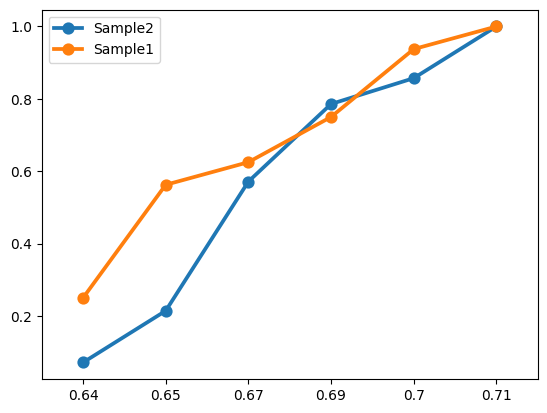

In [52]:
sns.pointplot(x = to_plot_s2, y = list(map(lambda point: calculate_distr_func(alpha*to_plot_s2**beta, point), alpha*to_plot_s2**beta)), label = 'Sample2')
sns.pointplot(x = to_plot_s1, y = list(map(lambda point: calculate_distr_func(to_plot_s1, point), to_plot_s1)), label = 'Sample1')

In [45]:
def calculate_Kolmogorov_statistic(sample_1, sample_2, alpha, beta):
    y_sample_1 = list(map(lambda point: calculate_distr_func(sample_1, point), alpha * sample_2 ** beta))
    y_sample_2 = list(map(lambda point: calculate_distr_func(alpha * sample_2 ** beta, point), alpha * sample_2 ** beta))
    max_dif = -1e10
    for y_1 in y_sample_1:
        for y_2 in y_sample_2:
            if np.abs(y_1 - y_2) > max_dif:
                max_dif = np.abs(y_1 - y_2)
    return max_dif * np.sqrt(len(sample_1))

In [34]:
kolmogorov_stat = calculate_Kolmogorov_statistic(sample_1_test, sample_2_test, alpha, beta)
alpha = 0.05   # 5%
K_alpha = np.sqrt(-1/2 * np.log((1 - alpha) / 2))

In [35]:
print(f"Статистика Колмогорова: {kolmogorov_stat}")
print(f"K_alpha: {K_alpha}")

Статистика Колмогорова: 4.795831523312719
K_alpha: 0.6100985473460397


In [36]:
from scipy.stats import ks_2samp
ks_2samp(sample_1_test, alpha * sample_2_test ** beta)

KstestResult(statistic=1.0, pvalue=4.858242125717109e-13, statistic_location=0.03747056793310765, statistic_sign=-1)